# Portfolio Project: Online Retail Exploratory Data Analysis with Python

## Overview

In this project, you will step into the shoes of an entry-level data analyst at an online retail company, helping interpret real-world data to help make a key business decision.

## Case Study
In this project, you will be working with transactional data from an online retail store. The dataset contains information about customer purchases, including product details, quantities, prices, and timestamps. Your task is to explore and analyze this dataset to gain insights into the store's sales trends, customer behavior, and popular products. 

By conducting exploratory data analysis, you will identify patterns, outliers, and correlations in the data, allowing you to make data-driven decisions and recommendations to optimize the store's operations and improve customer satisfaction. Through visualizations and statistical analysis, you will uncover key trends, such as the busiest sales months, best-selling products, and the store's most valuable customers. Ultimately, this project aims to provide actionable insights that can drive strategic business decisions and enhance the store's overall performance in the competitive online retail market.

## Project Objectives
1. Describe data to answer key questions to uncover insights
2. Gain valuable insights that will help improve online retail performance
3. Provide analytic insights and data-driven recommendations

## Dataset

The dataset you will be working with is the "Online Retail" dataset. It contains transactional data of an online retail store from 2010 to 2011. The dataset is available as a .xlsx file named `Online Retail.xlsx`. This data file is already included in the Coursera Jupyter Notebook environment, however if you are working off-platform it can also be downloaded [here](https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx).

The dataset contains the following columns:

- InvoiceNo: Invoice number of the transaction
- StockCode: Unique code of the product
- Description: Description of the product
- Quantity: Quantity of the product in the transaction
- InvoiceDate: Date and time of the transaction
- UnitPrice: Unit price of the product
- CustomerID: Unique identifier of the customer
- Country: Country where the transaction occurred

## Tasks

You may explore this dataset in any way you would like - however if you'd like some help getting started, here are a few ideas:

1. Load the dataset into a Pandas DataFrame and display the first few rows to get an overview of the data.
2. Perform data cleaning by handling missing values, if any, and removing any redundant or unnecessary columns.
3. Explore the basic statistics of the dataset, including measures of central tendency and dispersion.
4. Perform data visualization to gain insights into the dataset. Generate appropriate plots, such as histograms, scatter plots, or bar plots, to visualize different aspects of the data.
5. Analyze the sales trends over time. Identify the busiest months and days of the week in terms of sales.
6. Explore the top-selling products and countries based on the quantity sold.
7. Identify any outliers or anomalies in the dataset and discuss their potential impact on the analysis.
8. Draw conclusions and summarize your findings from the exploratory data analysis.

## Task 1: Load the Data

In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import statsmodels.api as sm

In [2]:
retail_df=pd.read_excel("C:/Users/USER PC/Desktop/Accenture/Online Retail.xlsx")

In [3]:
# To display the top rows
retail_df.head() 

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
# To display the bottom 5 rows
retail_df.tail(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


### Explore the basic statistics of the dataset, including measures of central tendency and dispersion.

## Descriptive Statistics

In [6]:
retail_df.describe()


,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


### Perform data cleaning by handling missing values, if any, and removing any redundant or unnecessary columns.

## Checking the types of data

Here we check for the data types because sometimes the prices of the retail would be stored as a string, if in that case, we have to convert that string to the interger data only then we can plot the data via a graph. In this case, the data is already in float format so nothing to worry

In [6]:
retail_df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

## Dropping the duplicate rows

This is often a handy thing to do because a huge data set as in this case contains more than 541909 rows often have some duplicate data which might be disturbing, so here I remove all the duplicate values from the dataset. For example prior to removing i had 541909 rows of data but after removing the duplicate 

In [7]:
retail_df.shape

(541909, 8)

In [8]:
duplicate_rows_df = retail_df[retail_df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (5268, 8)


Now let us remove the duplicate data because it's ok to remove them

In [9]:
# Used to count the number of rows
retail_df.count()

InvoiceNo      541909
StockCode      541909
Description    540455
Quantity       541909
InvoiceDate    541909
UnitPrice      541909
CustomerID     406829
Country        541909
dtype: int64

So seen above there are 541909 rows and we are removing 5268 rows of duplicate data

In [3]:
retail_df = retail_df.drop_duplicates()
retail_df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [13]:
retail_df.count()

InvoiceNo      536641
StockCode      536641
Description    535187
Quantity       536641
InvoiceDate    536641
UnitPrice      536641
CustomerID     401604
Country        536641
dtype: int64

## Dropping the missing or null values

This is mostly similiar to the previous step but in here all the missing values are detected are droped later. Now, this is not a good appraoch to do so, because many people just replace the missing values with the mean or average coumn, but in this case, I just dropped the missing values.

In [14]:
print(retail_df.isnull().sum())

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64


In [9]:
# dropiing missing vlalues
retail_df = retail_df.dropna()
retail_df.count()

InvoiceNo      406829
StockCode      406829
Description    406829
Quantity       406829
InvoiceDate    406829
UnitPrice      406829
CustomerID     406829
Country        406829
dtype: int64

## Identifying Outliers or anomalies

An outlier is a points that are different from other points. Somerimes theycan be very high or very low. It's often good idea to identfy and remove the outliers. Because outliers are one of the primary reasons for resulting in a less accurate model. Therefore it's a good idea to remove them. The outlier identificaion and removing that I am going to perform is called IQR score technique. Often outliers can be seen with visualization usingabox plot. Shown below are the box plot of UnitPrice, Quantity and CustomerID. Herein all the plots, you can find some points are outside the box they are none other than outliers.

<AxesSubplot:xlabel='UnitPrice'>

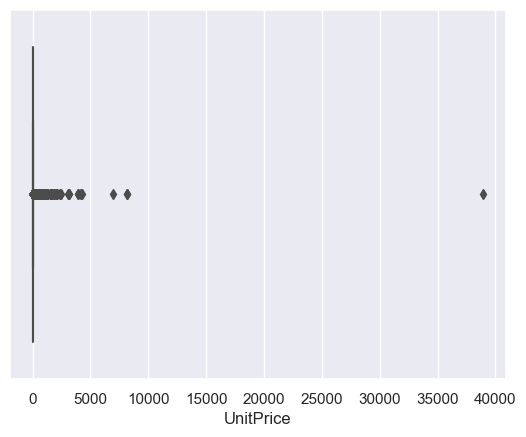

In [16]:
sns.boxplot(x=retail_df['UnitPrice'])

<AxesSubplot:xlabel='Quantity'>

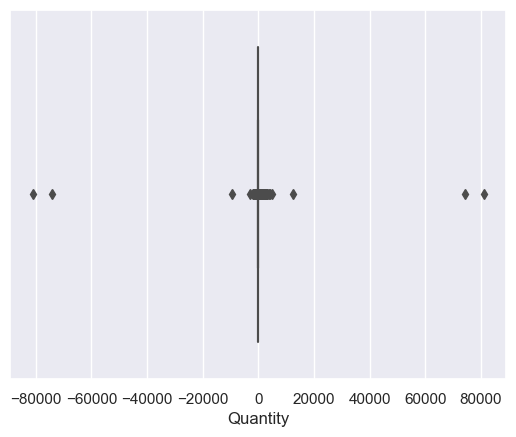

In [17]:
sns.boxplot(x=retail_df['Quantity'])

<AxesSubplot:xlabel='CustomerID'>

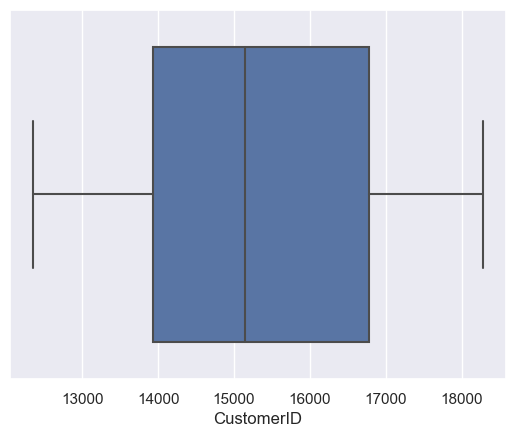

In [18]:
sns.boxplot(x=retail_df['CustomerID'])

In [20]:
Q1 = retail_df.quantile(0.25)
Q3 = retail_df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Quantity        10.0
UnitPrice        2.5
CustomerID    2845.0
dtype: float64


### Perform data visualization to gain insights into the dataset. Generate appropriate plots, such as histograms, scatter plots, or bar plots, to visualize different aspects of the data.

## Histogram

Histogram refers to the frequency of occurrence of variables in an interval. In this case, there are mainly 

Bar chart of the top 10 selling products by quantity sold

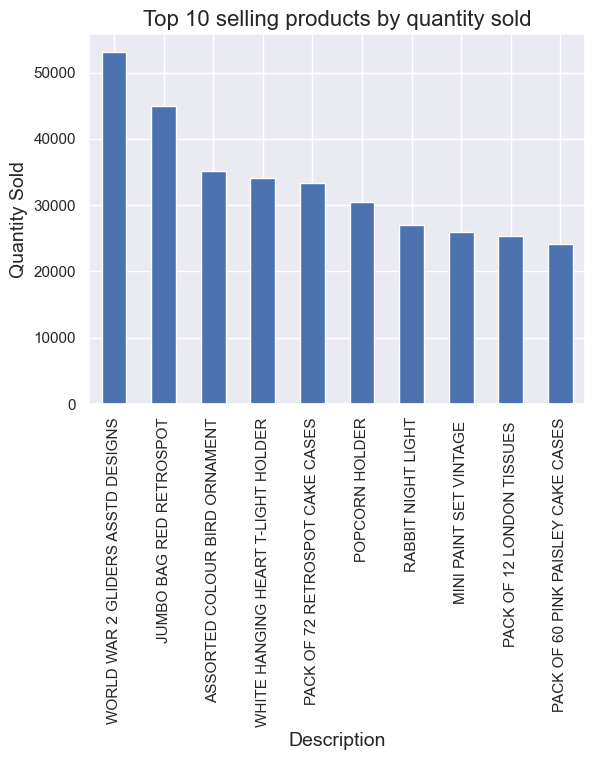

In [26]:
top_products = retail_df.groupby('Description')['Quantity'].sum().nlargest(10)
top_products.plot(kind = 'bar')
plt.xlabel('Description', fontsize=14)
plt.ylabel('Quantity Sold', fontsize=14)
plt.title('Top 10 selling products by quantity sold', fontsize=16)
plt.show()

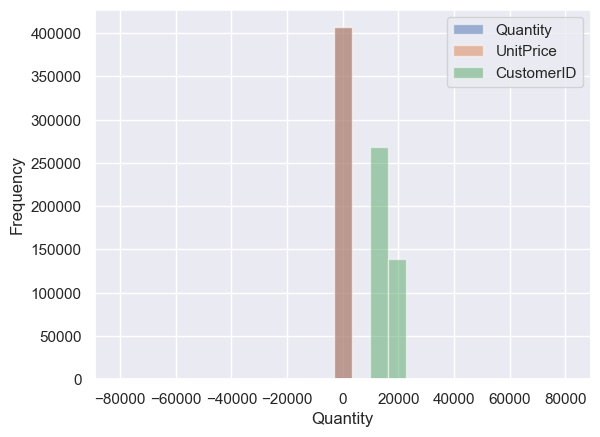

In [11]:
sns.set_context("notebook")
ax = retail_df.plot.hist(bi=25, alpha=0.5)
ax.set_xlabel('Quantity');

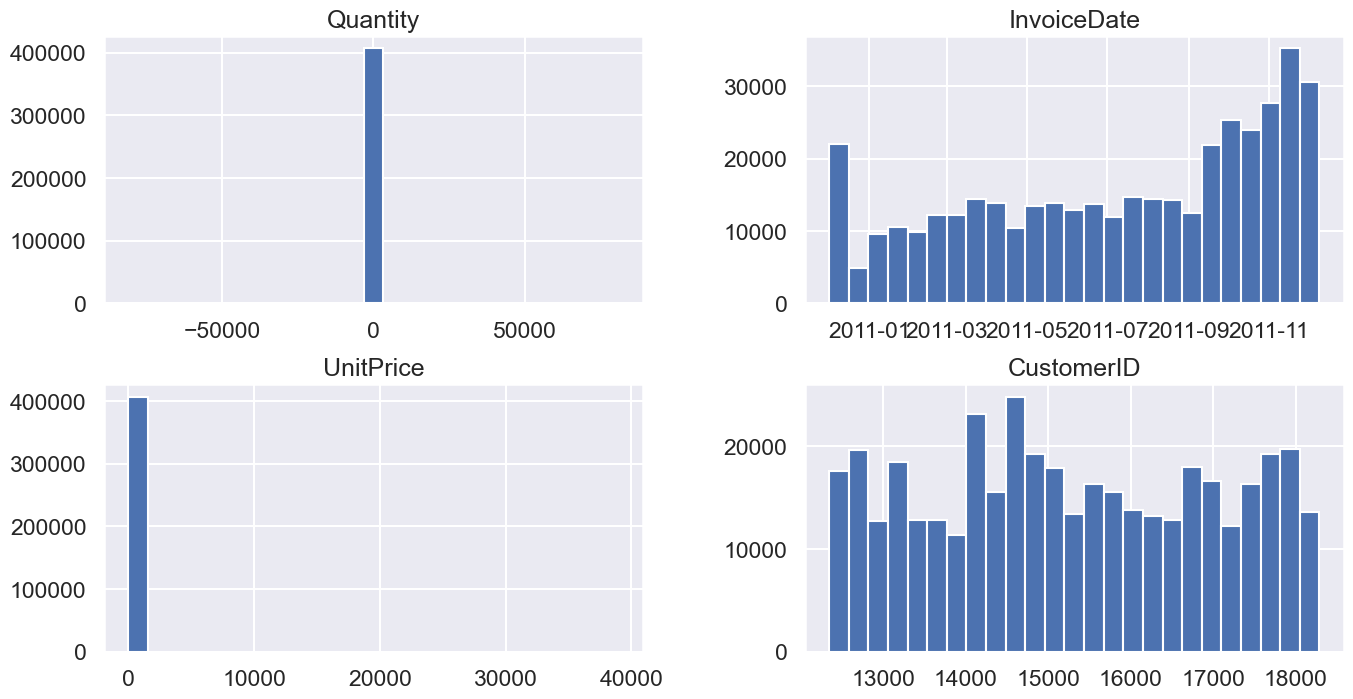

In [26]:
axlist = retail_df.hist(bins=25, figsize =(16, 8))

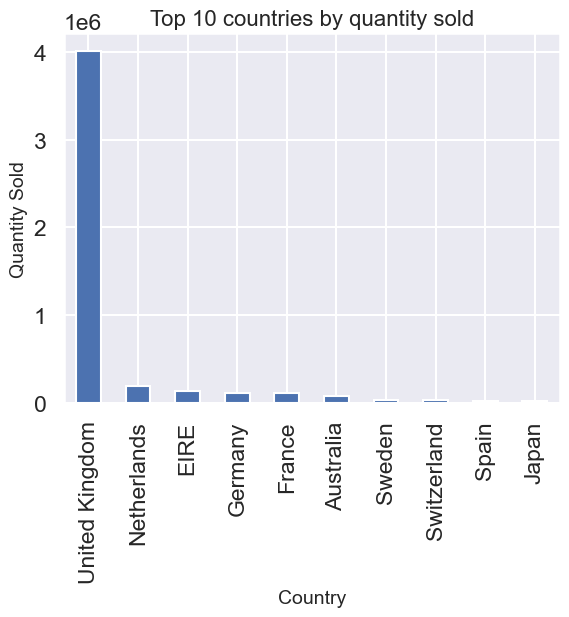

In [28]:
top_products = retail_df.groupby('Country')['Quantity'].sum().nlargest(10)
top_products.plot(kind = 'bar')
plt.xlabel('Country', fontsize=14)
plt.ylabel('Quantity Sold', fontsize=14)
plt.title('Top 10 countries by quantity sold', fontsize=16)
plt.show()

## Heat Maps

Heat Maps is a type of plot which is necessary when we need to find the dependent variables. One of the best way to find the relationship between the features can be done using heat maps.

,Quantity,UnitPrice,CustomerID
Quantity,1.000000,-0.001243,-0.003457
UnitPrice,-0.001243,1.000000,-0.004524
CustomerID,-0.003457,-0.004524,1.000000


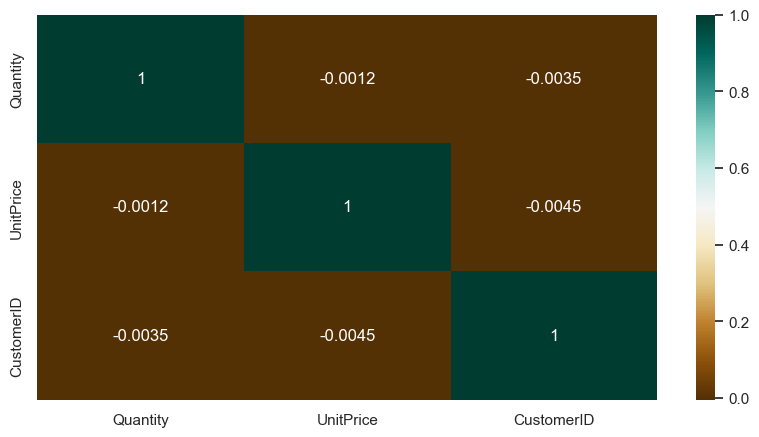

In [7]:
plt.figure(figsize=(10, 5))
c = retail_df.corr()
sns.heatmap(c, cmap="BrBG", annot=True)
c

## Scatterplot

We generally use scatterplots to find the correlation between two variables. Here the scatterplot are plotted 

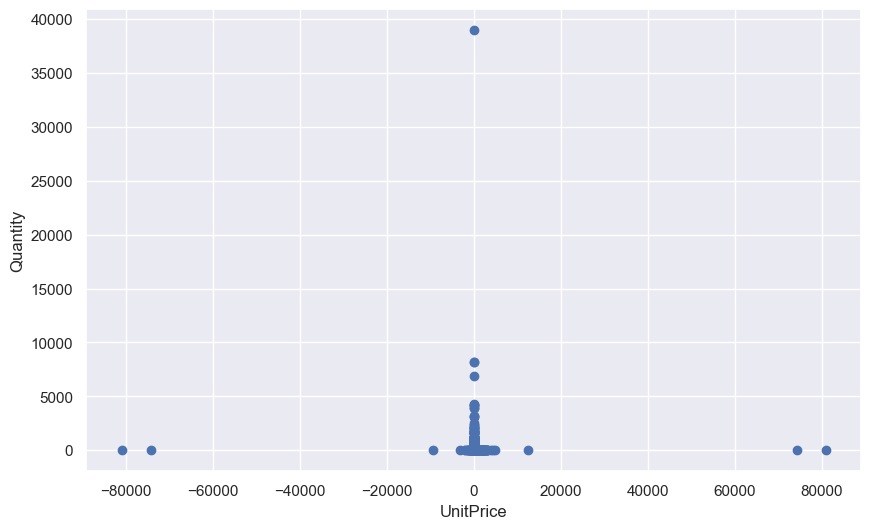

In [12]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(retail_df['Quantity'], retail_df['UnitPrice'])
ax.set_xlabel('UnitPrice')
ax.set_ylabel('Quantity')
plt.show()

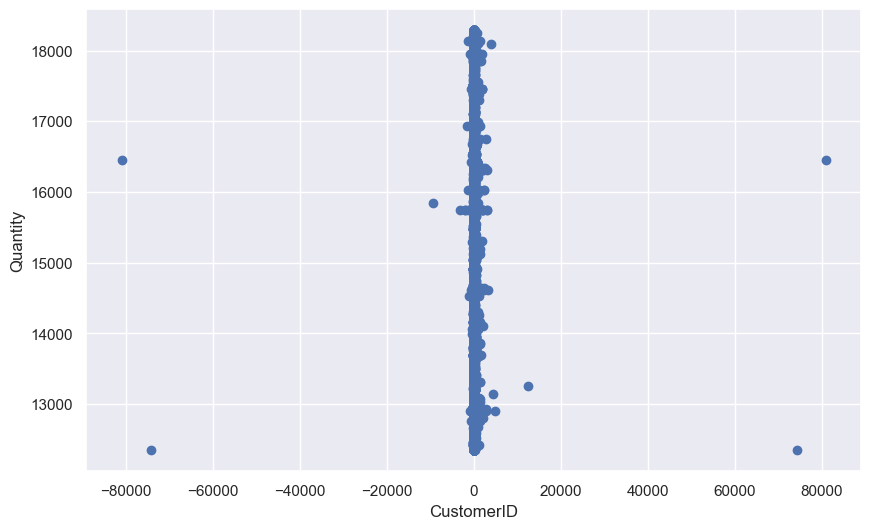

In [17]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(retail_df['Quantity'], retail_df['CustomerID'])
ax.set_xlabel('CustomerID')
ax.set_ylabel('Quantity')
plt.show()

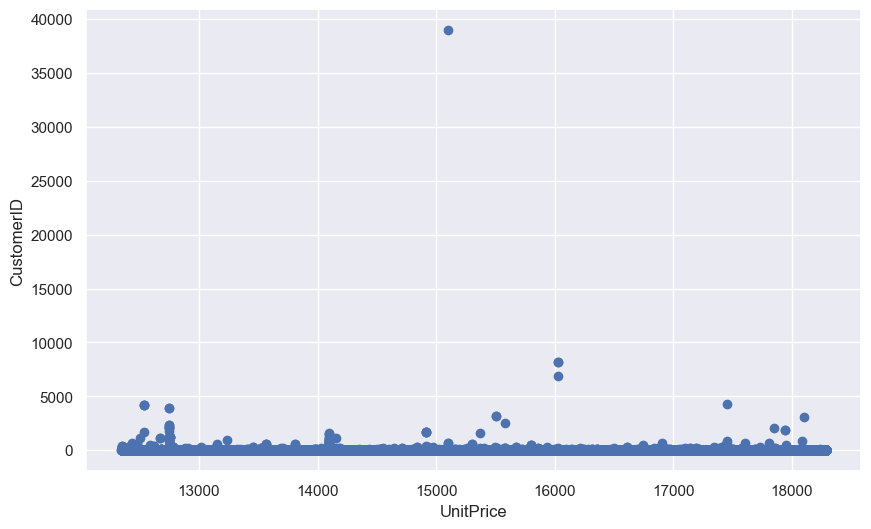

In [16]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(retail_df['CustomerID'], retail_df['UnitPrice'])
ax.set_xlabel('UnitPrice')
ax.set_ylabel('CustomerID')
plt.show()

###  Analyze the sales trends over time. Identify the busiest months and days of the week in terms of sales.

In [30]:
retail_df['day_of_week'] = retail_df['InvoiceDate'].dt.day_name()

In [6]:
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,day_of_week
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Wednesday
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Wednesday
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday


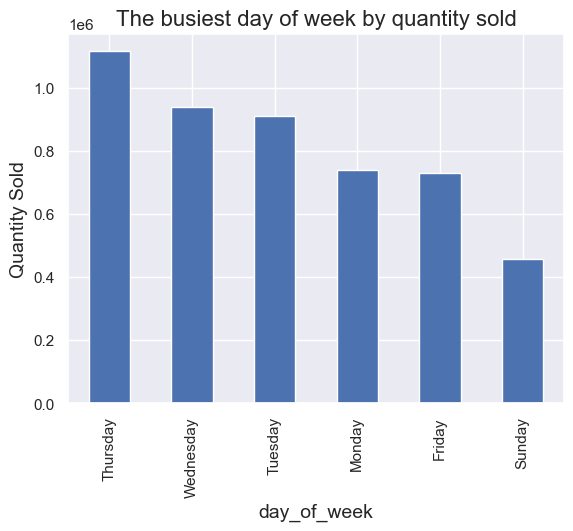

In [14]:
top_products = retail_df.groupby('day_of_week')['Quantity'].sum().nlargest(10)
top_products.plot(kind = 'bar')
plt.xlabel('day_of_week', fontsize=14)
plt.ylabel('Quantity Sold', fontsize=14)
plt.title('The busiest day of week by quantity sold', fontsize=16)
plt.show()

In [31]:
retail_df['Month'] = retail_df['InvoiceDate'].dt.month_name()

In [8]:
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,day_of_week,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Wednesday,December
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,December
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Wednesday,December
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,December
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,December


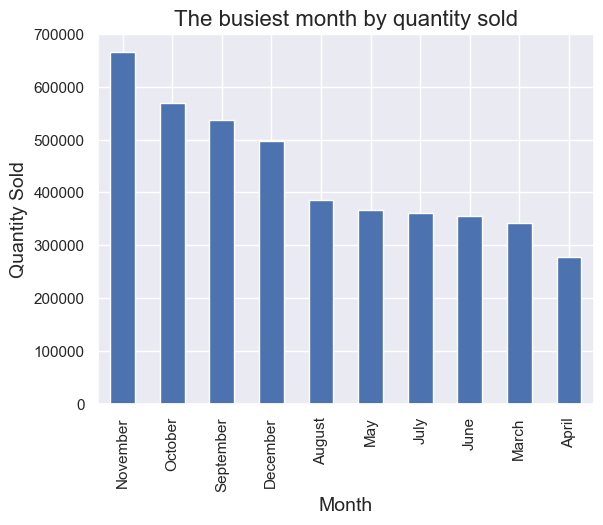

In [11]:
top_products = retail_df.groupby('Month')['Quantity'].sum().nlargest(10)
top_products.plot(kind = 'bar')
plt.xlabel('Month', fontsize=14)
plt.ylabel('Quantity Sold', fontsize=14)
plt.title('The busiest month by quantity sold', fontsize=16)
plt.show()

## Conclusion

I found the following insights as part of the analysis:

- World War 2 Gilders ASSTD Design and jumbo Bag Red Retrospot are the best selling products by quantity sold
- United kingdom and Netherland most valuable countries by quantity solid
- Thursday and Wednessday are the busiest days of the week in terms of sales
- November and October are the busiest months in terms of sales
